# ITS488 : Machine Learning Project > Wine Type and Quality Prediction with ML

Presented by

5822790416 Nonwarit Suwanmolee

5822783411 Panjarat Sukonthachartnant

5822792909 Natcha Suttiwattana 

5922800586 Thanadorn Worraphattarachaya


## 1. Importing Packages

In [0]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

## 2. Data Loading & Discription

__Context__
- The two datasets are related to red and white variants of the Portuguese wine.
- I have downloaded these datasets from UCI Machine Learning Respository.

__Content__ <br/>
Both datasets contains __12__ variables: <br/>
 1. fixed acidity
 2. volatile acidity
 3. citric acid
 4. residual sugar
 5. chlorides
 6. free sulfur dioxide
 7. total sulfur dioxide
 8. density
 9. pH
 10. sulphates
 11. alcohol
 12. quality (score between 0 - 10)

### 2.1 Loading both datasets

In [0]:
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [202]:
# Shape of white wine dataset
white_wine.shape

(4898, 12)

In [203]:
# Shape of red wine dataset
red_wine.shape

(1599, 12)

In [0]:
# add wines type field
white_wine['wine_type'] = 'white'
red_wine['wine_type'] = 'red'

### 2.2 Merging two datasets

In [205]:
# we merge both datasets for accurate analysis
wine_data = pd.concat([white_wine,red_wine])
wine_data.shape

(6497, 13)

## 3. Understanding Data

In [206]:
# display column names of data
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [0]:
# adding label column which will use for prediction of quality of wine
wine_data['quality_label'] = wine_data['quality'].apply(lambda value: 'low'
                                                       if value <= 5 else 'medium'
                                                       if value <=7 else 'high')

In [0]:
# change quality_label column in categorical variable
wine_data['quality_label'] = pd.Categorical(wine_data['quality_label'], categories = ['low','medium','high'])

In [0]:
# reshuffling the dataset
wine_data = wine_data.sample(frac=1,random_state=92).reset_index(drop=True)

In [210]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.1,0.320,0.34,14.5,0.039,46.0,150.0,0.99500,3.38,0.50,12.5,8,white,high
1,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4,red,low
2,6.6,0.260,0.27,11.8,0.048,28.0,112.0,0.99606,2.87,0.49,9.7,6,white,medium
3,6.8,0.300,0.27,11.6,0.028,22.0,97.0,0.99314,2.96,0.38,11.7,6,white,medium
4,6.9,0.250,0.29,2.4,0.038,28.0,76.0,0.99088,3.01,0.36,11.7,7,white,medium


In [211]:
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
6492,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5,red,low
6493,6.1,0.250,0.24,12.1,0.046,51.0,172.0,0.99800,3.35,0.45,9.5,5,white,low
6494,8.5,0.370,0.32,1.8,0.066,26.0,51.0,0.99456,3.38,0.72,11.8,6,red,medium
6495,6.6,0.230,0.32,1.5,0.041,8.0,72.0,0.98949,3.22,0.39,12.7,6,white,medium
6496,8.0,0.330,0.32,4.6,0.041,31.0,180.0,0.99184,2.92,0.74,12.2,6,white,medium


In [212]:
# Information about the data
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
wine_type               6497 non-null object
quality_label           6497 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 666.4+ KB


In [213]:
# display statistical information of dataset
print("Number of rows: ", wine_data.shape[0])
print("Number of columns: ", wine_data.shape[1])

df = wine_data.describe()
df.drop(["count"],axis=0,inplace=True)
df.T

Number of rows:  6497
Number of columns:  14


,mean,std,min,25%,50%,75%,max
fixed acidity,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [214]:
wine_data.isnull().sum()                                                 # This will print count of NaN values in column     

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
quality_label           0
dtype: int64

#### we can see from above result that there is no NaN values exist

## 4. Univariate Analysis

#### This is one of the easiest step in exploratory data analysis. 

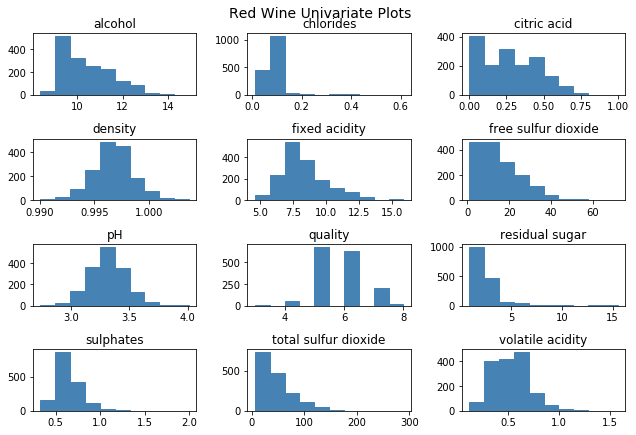

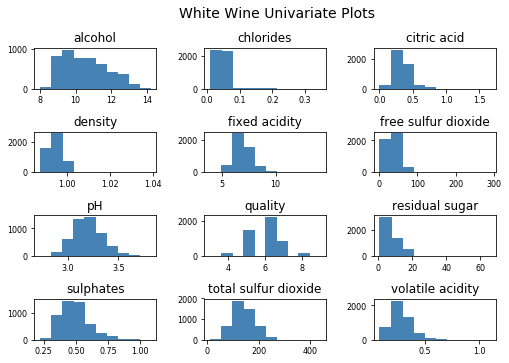

In [215]:
# histogram for univariate analysis
red_wine.hist(bins=10, color='#4682B4', edgecolor='#4682B4', linewidth=1.0,
              xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 1.5))   
rt = plt.suptitle('Red Wine Univariate Plots', x=0.75, y=1.5, fontsize=14)  

white_wine.hist(bins=10, color='#4682B4', edgecolor='#4682B4', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
wt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)

#### we can draw some insights from above plots

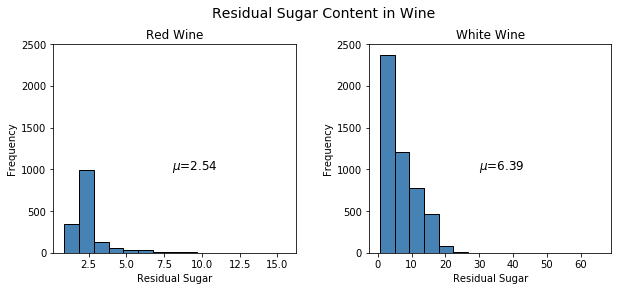

In [216]:
# plotting the residual sugar
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Residual Sugar Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'], color='#4682B4', bins=15,
                                    edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(30, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'], color='#4682B4', bins=15,
                                    edgecolor='black', linewidth=1)

#### here we can see that residual sugar content in white wine samples seems to be more as compared to red wine samples  

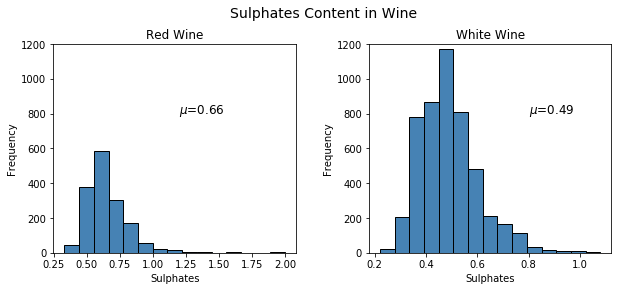

In [217]:
# checking Sulphates content in wine
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='#4682B4', bins=15,
                                    edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='#4682B4', bins=15,
                                    edgecolor='black', linewidth=1)

#### here we can see that the sulphate content in white wine seems to be higher as compare to red wine.  

## 5. Multivariate Analysis

#### Multivariate analysis is used to analyze multiple variables and their relationships.

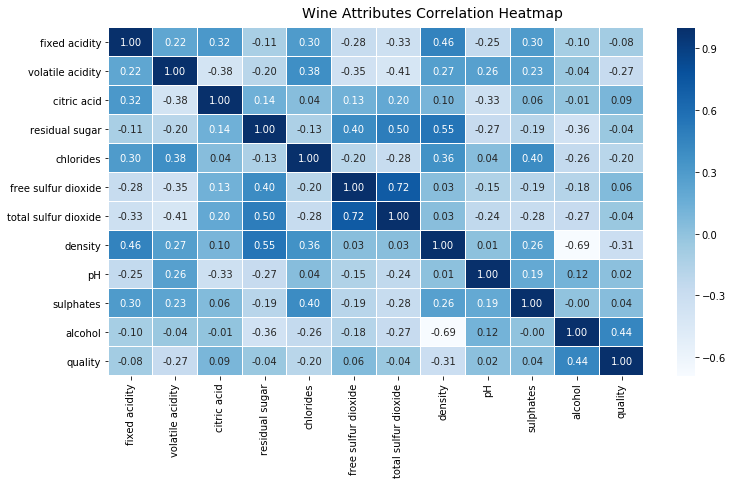

In [218]:
f, ax = plt.subplots(figsize=(12, 6))
corr = wine_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

#### here we can see that a strong negative correlation between density and alcohol and a strong positive correlation between total and free sulfur dioxide.

## 6. Predictive Analysis

__Now here we would create different models on this dataset and compare their accuracy.__

Here we will do two types of prediction in this dataset.
 1. Prediction of wine types.
 2. Prediction of wine quality.

In [0]:
# importing libraries
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [220]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.1,0.320,0.34,14.5,0.039,46.0,150.0,0.99500,3.38,0.50,12.5,8,white,high
1,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4,red,low
2,6.6,0.260,0.27,11.8,0.048,28.0,112.0,0.99606,2.87,0.49,9.7,6,white,medium
3,6.8,0.300,0.27,11.6,0.028,22.0,97.0,0.99314,2.96,0.38,11.7,6,white,medium
4,6.9,0.250,0.29,2.4,0.038,28.0,76.0,0.99088,3.01,0.36,11.7,7,white,medium


In [0]:
# input variables data
X = wine_data.iloc[:,:-3]

In [222]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [223]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
dtypes: float64(11)
memory usage: 558.4 KB


#### we can see that there are no missing values in any input variables

### 6.1 Prediction for wine type

In [0]:
# class variable for wine type
wine_data['wine_type'] = np.where(wine_data['wine_type']=='red',1,0)

In [0]:
# output/response variable
y = wine_data['wine_type']

In [226]:
# here 1 represents red wine type and 0 represents white wine type 
y.head()

0    0
1    1
2    0
3    0
4    0
Name: wine_type, dtype: int64

In [0]:
# splitting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [228]:
X_train.shape

(4547, 11)

In [229]:
y_train.shape

(4547,)

In [0]:
# scaling the features
S =StandardScaler()
X_train_s = S.fit_transform(X_train)
X_test_s  = S.fit_transform(X_test)

In [231]:
X_train_s

array([[-0.17022383, -1.09405453,  0.00548883, ..., -0.06154589,
        -1.30024831, -1.08684437],
       [-0.94605477, -1.03320198, -0.75080516, ..., -0.8662437 ,
         0.04369974, -0.58483578],
       [-0.24780692, -0.18126621,  0.14299683, ...,  1.48594992,
         0.58127896,  0.5028495 ],
       ...,
       [ 1.53660425, -0.36382387,  0.96804481, ..., -0.49484471,
         0.31248935, -0.83584007],
       [ 2.31243519,  0.12299657,  2.20561679, ...,  0.06225378,
         0.85006857,  1.67420289],
       [-0.24780692, -0.66808665,  0.07424283, ...,  1.23835059,
        -0.76266909, -0.58483578]])

### Building model using Logistic Regression

In [232]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1500, solver = 'lbfgs')
lr.fit(X_train_s, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = lr.predict(X_test_s)

In [234]:
# accuracy
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.9953846153846154


In [235]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[1482,    5],
       [   4,  459]])

In [236]:
# classification report
print(classification_report(y_test,y_pred), end = "\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1487
           1       0.99      0.99      0.99       463

   micro avg       1.00      1.00      1.00      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



### Building model using Random Forest classification

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_s,y_train)
y_pred = rf.predict(X_test_s)

In [238]:
# printing accuracy, confusion matrix and classification report
print("Accuracy: ",accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test, y_pred),end = "\n")

Accuracy:  0.9964102564102564

Confusion Matrix: 
 [[1484    3]
 [   4  459]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1487
           1       0.99      0.99      0.99       463

   micro avg       1.00      1.00      1.00      1950
   macro avg       1.00      0.99      1.00      1950
weighted avg       1.00      1.00      1.00      1950



#### we saw that accuracies in both models are comparable, so any model can be used, __Logistic Regression__ is preferred here because it is simple to implement. 

### 6.2 Prediction for wine quality

The prediction of wine quality will be among three classes __low, medium and high__ 

In [0]:
# input variables
XX = wine_data.iloc[:,:-3]
class_labels = np.array(wine_data['quality_label'])
label_names = ['low','medium','high']
XX_names = list(XX.columns)

In [0]:
# spliting data into training and test
X_train, X_test, y_train, y_test = train_test_split(XX, class_labels, test_size = 0.30, random_state = 35)

In [241]:
# printing counter of train and test data for response variable with wine quality category
print(Counter(y_train), Counter(y_test))

Counter({'medium': 2744, 'low': 1664, 'high': 139}) Counter({'medium': 1171, 'low': 720, 'high': 59})


In [0]:
# scaling the features
ss = StandardScaler().fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s  = ss.transform(X_test)

#### Building model using Decision Tree Classification

In [243]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_s, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
# prediction for wine quality
y_pred = dt.predict(X_test_s)

In [245]:
# printing accuracy, confusion matrix and classification report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.7302564102564103

Confusion Matrix: 
 [[ 20   5  34]
 [  2 491 227]
 [ 32 226 913]]

Classification Report: 
               precision    recall  f1-score   support

        high       0.37      0.34      0.35        59
         low       0.68      0.68      0.68       720
      medium       0.78      0.78      0.78      1171

   micro avg       0.73      0.73      0.73      1950
   macro avg       0.61      0.60      0.60      1950
weighted avg       0.73      0.73      0.73      1950



here we can see that recall for the high quality wine is bad because a lot of them have been misclassified into medium and low quality. This is expected since we do not have a sufficient training samples for high quality wine as displayed earlier. 

#### Building model using Random Forest 

In [246]:
# finding best parameters by using GridSearchCV 
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}

clf = GridSearchCV(RandomForestClassifier(random_state=38), param_grid, cv=5,
                       scoring='accuracy')
clf.fit(X_train_s, y_train)
print(clf.best_params_)

{'max_features': 'auto', 'n_estimators': 300}


In [0]:
# predicting by model
rf = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=38)
rf.fit(X_train_s, y_train)

y_pred= rf.predict(X_test_s)

In [248]:
# printing accuracy, confusion matrix and classification report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8061538461538461

Confusion Matrix: 
 [[  19    0   40]
 [   0  503  217]
 [   0  121 1050]]

Classification Report: 
               precision    recall  f1-score   support

        high       1.00      0.32      0.49        59
         low       0.81      0.70      0.75       720
      medium       0.80      0.90      0.85      1171

   micro avg       0.81      0.81      0.81      1950
   macro avg       0.87      0.64      0.69      1950
weighted avg       0.81      0.81      0.80      1950



here we obtained accuracy of 80% which is better than Decision Tree, hence Random Forest is much better than the Decision Tree model. 

---



## 7. Conclusion

#### Here we explred various components of exploratory data analysis and model building. In our analysis the Random Forest model performed better than the other models. 